In [5]:

import pandas as pd
import random 
import sys
import os

from scipy.stats import uniform, randint


# from ray import tune
# from ray.tune.schedulers import ASHAScheduler

%load_ext autoreload
%autoreload 2


In [8]:
notebooks_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebooks_dir, os.pardir))

# Add the project root directory to sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

try:
    from utils.model_utils import train, predict, evaluate, random_search, inverse_normalize
    from utils.process_data import get_processed_data
    from utils.plots import plot_losses, plot_predictions_vs_labels, plot_predictions_vs_labels_by_species\
    , plot_boxplot_predictions_vs_labels, plot_hexbin_predictions_vs_labels, plot_histogram
    print("Import successful")
except ImportError as e:
    print(f"Error importing module: {e}")


Import successful


# Load Data and Test Different Normalizations

In [9]:
data_df = get_processed_data(project_root)

C:\Users\mehme\PycharmProjects\ML4RG_Group1/data/merged_data.csv


In [10]:
data_df

,species,csv,upstream200,stress,stress_name
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Achromobacter xylosoxidans SOLR10.csv,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0,...",-0.624611,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Achromobacter xylosoxidans SOLR10.csv,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0,...",0.922333,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Achromobacter xylosoxidans SOLR10.csv,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0,...",0.013922,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Achromobacter xylosoxidans SOLR10.csv,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0,...",0.033641,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Achromobacter xylosoxidans SOLR10.csv,"[[0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0,...",-1.053069,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
...,...,...,...,...,...
100716,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Vibrio cholerae O1 biovar El Tor str. N16961.csv,"[[1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0,...",0.452883,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
100716,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Vibrio cholerae O1 biovar El Tor str. N16961.csv,"[[1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0,...",-0.152568,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
100716,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Vibrio cholerae O1 biovar El Tor str. N16961.csv,"[[1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0,...",0.372162,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
100716,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Vibrio cholerae O1 biovar El Tor str. N16961.csv,"[[1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0,...",-0.762664,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"


In [ ]:
data_df.describe()

In [62]:
data_df.describe()

,Stress
count,972074.000000
mean,0.797510
std,0.491112
min,0.000089
25%,0.537830
50%,0.711443
75%,0.924422
max,8.911785


In [53]:
data_df_2 = load_dataframe(normalize_by_ctrl=True, log_norm=True)
data_df_2.describe()

,Stress
count,1.078334e+06
mean,4.126938e+00
std,1.798566e+00
min,4.932298e-03
25%,2.849915e+00
50%,4.209079e+00
75%,5.343665e+00
max,1.368250e+01


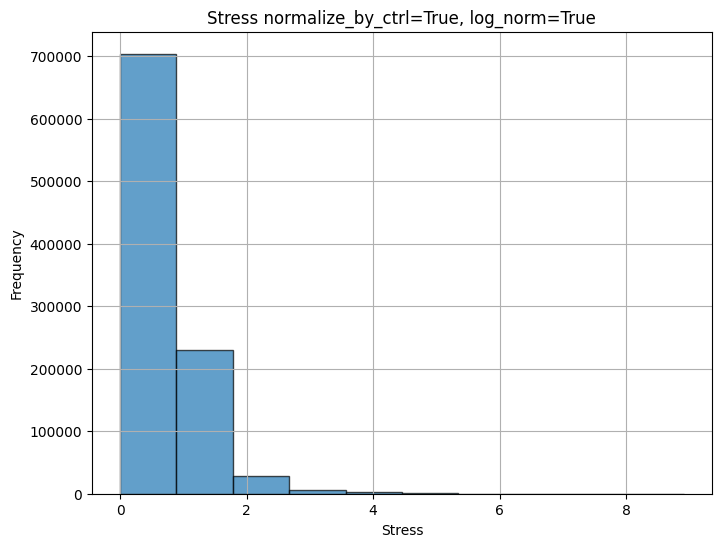

In [63]:
plot_histogram(data_df['Stress'], title=f'Stress normalize_by_ctrl=True, log_norm=True', xlabel='Stress', bins=10)


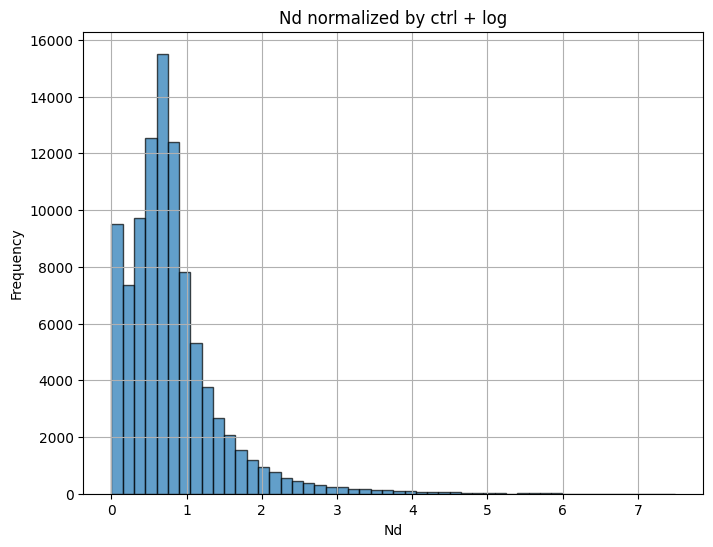

count    96411.000000
mean         0.799756
std          0.648071
min          0.000000
25%          0.414866
50%          0.688676
75%          0.992930
max          7.496069
Name: Nd, dtype: float64


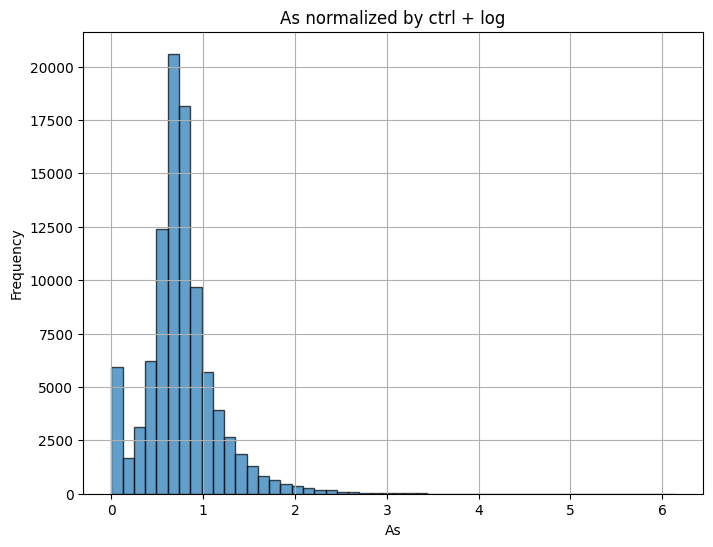

count    96411.000000
mean         0.758847
std          0.395021
min          0.000000
25%          0.571828
50%          0.726843
75%          0.904036
max          6.137985
Name: As, dtype: float64


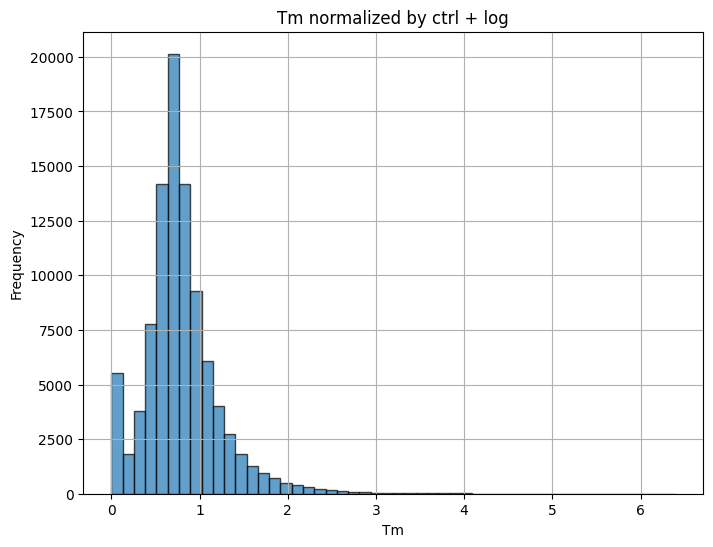

count    96411.000000
mean         0.788466
std          0.436571
min          0.000000
25%          0.567023
50%          0.732991
75%          0.955253
max          6.390254
Name: Tm, dtype: float64


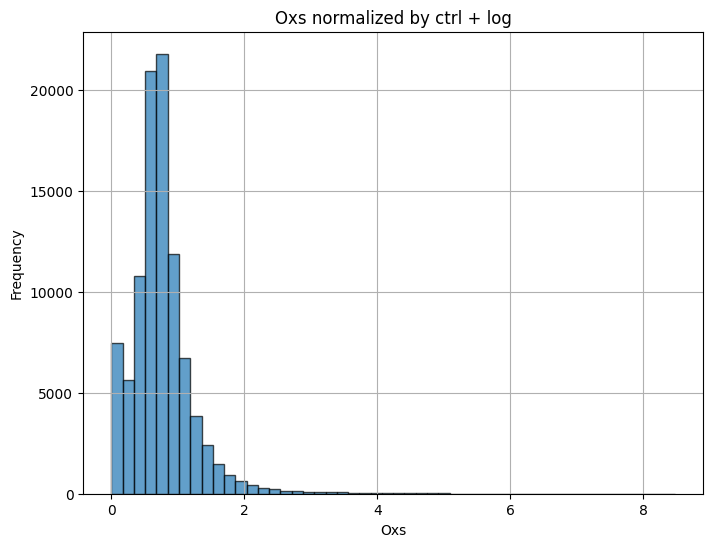

count    96411.000000
mean         0.753477
std          0.483396
min          0.000000
25%          0.511295
50%          0.700126
75%          0.915550
max          8.479565
Name: Oxs, dtype: float64


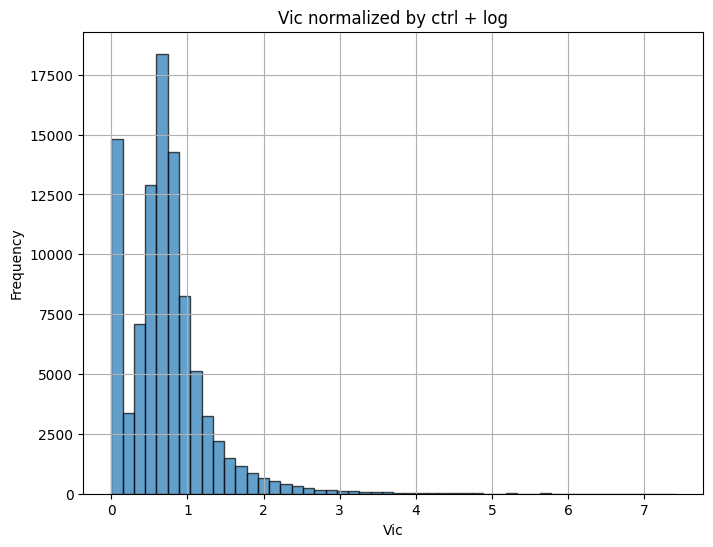

count    96411.000000
mean         0.718546
std          0.557364
min          0.000000
25%          0.426280
50%          0.675466
75%          0.910541
max          7.402480
Name: Vic, dtype: float64


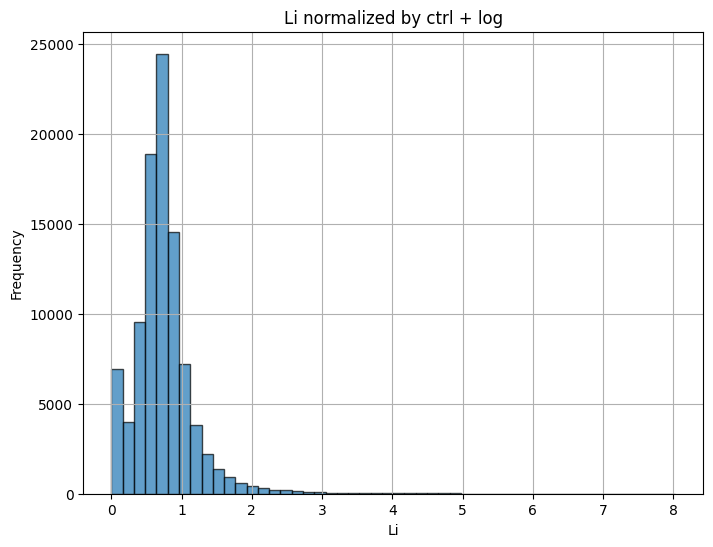

count    96411.000000
mean         0.736613
std          0.453330
min          0.000000
25%          0.521179
50%          0.697955
75%          0.879943
max          8.024574
Name: Li, dtype: float64


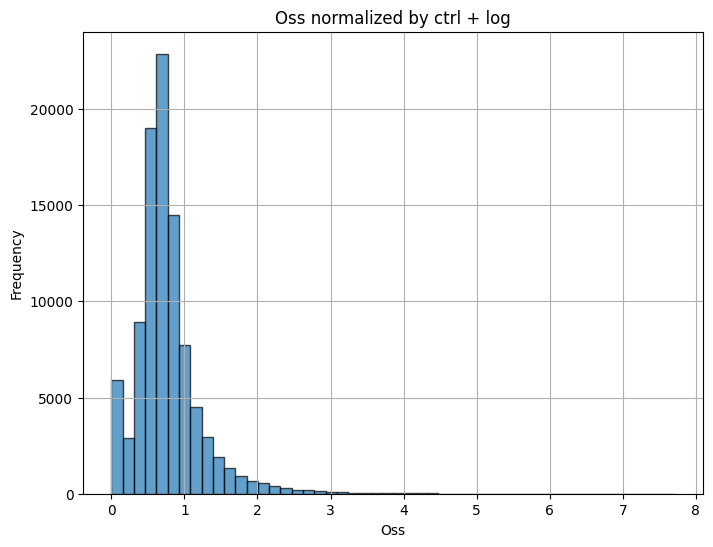

count    96411.000000
mean         0.760385
std          0.467889
min          0.000000
25%          0.524214
50%          0.690555
75%          0.900678
max          7.713939
Name: Oss, dtype: float64


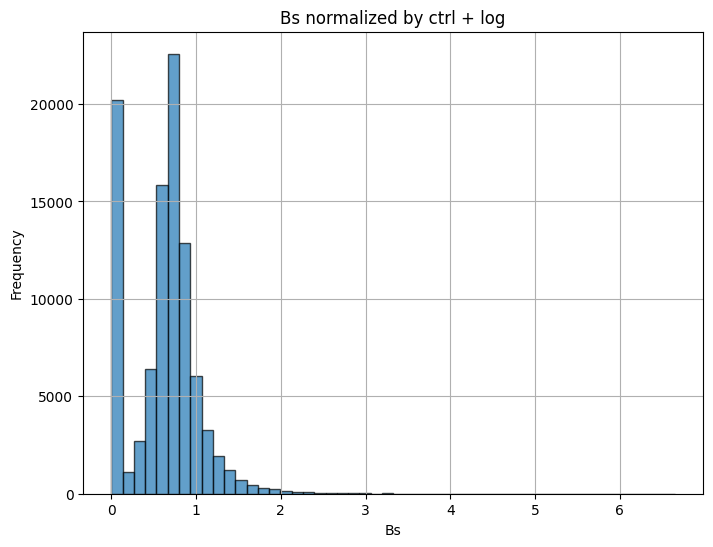

count    96411.000000
mean         0.615885
std          0.415385
min          0.000000
25%          0.401665
50%          0.676651
75%          0.825201
max          6.652507
Name: Bs, dtype: float64


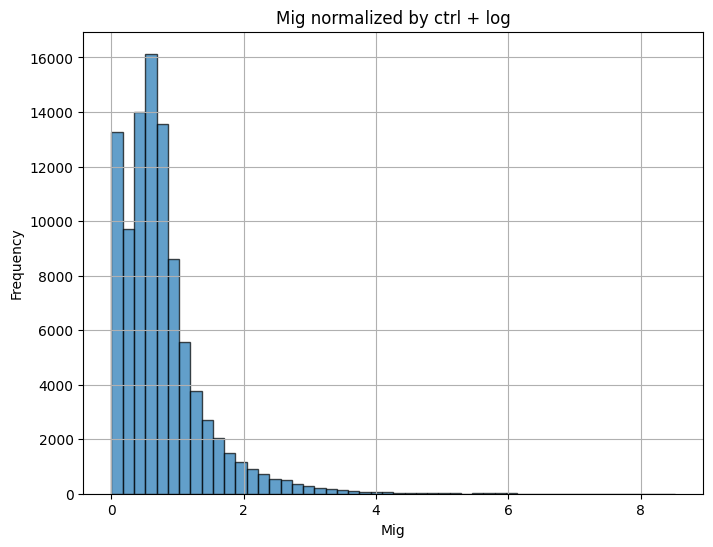

count    96411.000000
mean         0.748951
std          0.640282
min          0.000000
25%          0.356813
50%          0.628963
75%          0.955920
max          8.518375
Name: Mig, dtype: float64


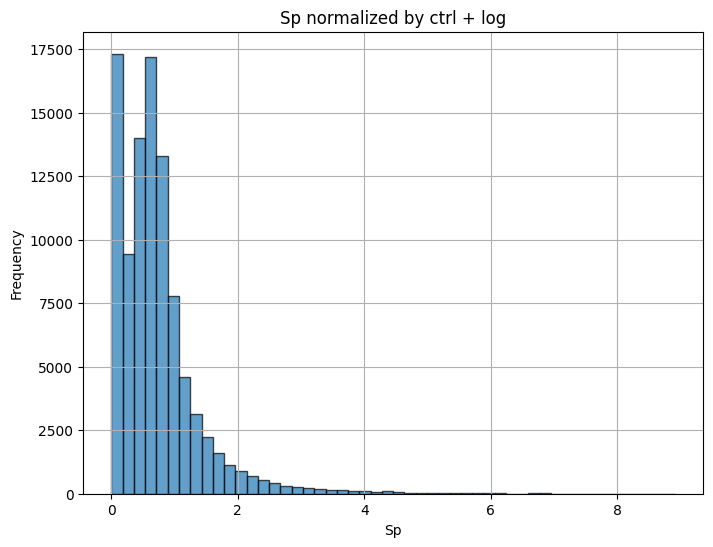

count    96411.000000
mean         0.723479
std          0.686165
min          0.000000
25%          0.311183
50%          0.611443
75%          0.909944
max          8.911785
Name: Sp, dtype: float64


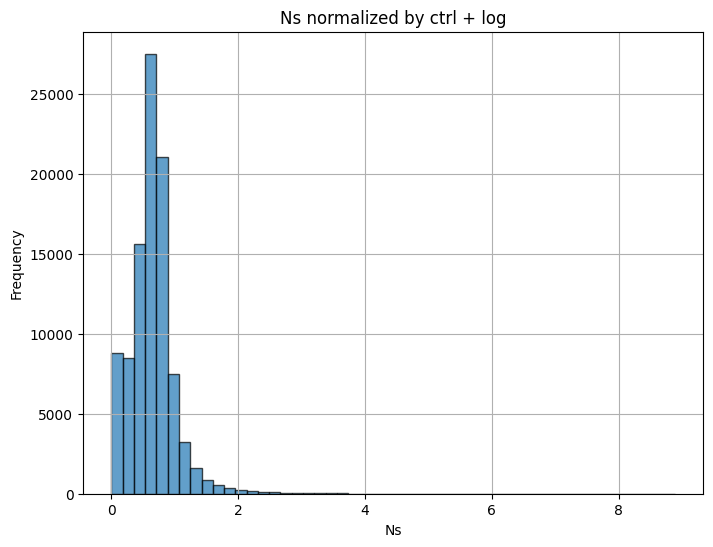

count    96411.000000
mean         0.640697
std          0.379499
min          0.000000
25%          0.444693
50%          0.642157
75%          0.789402
max          8.889272
Name: Ns, dtype: float64


In [43]:
# Just a cell for debugging the normalization methods
raw_df = pd.read_csv('combined_data.csv')


def calculate_mean(row, stress_cols, control_cols):
    # First divides stress TPM values to control values respectively then calculates the mean of available TPM values
    values = []
    for stress_col, control_col in zip(stress_cols, control_cols):
        stress_val = row[stress_col]
        control_val = row[control_col]
        if pd.notna(stress_val) and pd.notna(control_val) and control_val != 0:
            values.append(stress_val / control_val)
    if len(values) > 0:
        return np.log(np.mean(values) + 1)
    else:
        return 0
        

averages_df = raw_df.copy()
stress_conditions = set([name.split('_')[0] for name in raw_df.columns if 'TPM' in name])
control_condition = 'Ctrl'
control_columns = [name for name in raw_df.columns if control_condition+'_' in name]
stress_conditions.remove(control_condition)

for stress in stress_conditions:
    if stress == control_condition:
        continue
    stress_columns = [name for name in raw_df.columns if stress+'_' in name]
    averages_df[f'{stress}'] = raw_df.apply(calculate_mean, axis=1, stress_cols=stress_columns, control_cols=control_columns)

    plot_histogram(averages_df[f'{stress}'], title=f'{stress} normalized by ctrl + log', xlabel=stress, bins=50)
    print(averages_df[f'{stress}'].describe())
    
    # outliers = averages_df[averages_df[f'{stress}'] > 100]
    # if not outliers.empty:
    #     print(f'Outliers for {stress}:')
    #     print(outliers)

In [ ]:
species_id_series = data_df['Species ID']

# Find the unique positions of 1s
unique_species_ids = set()
for one_hot_list in species_id_series:
    for idx, val in enumerate(one_hot_list):
        if val == 1:
            unique_species_ids.add(idx)

# Display the set of unique species IDs based on the positions
print(unique_species_ids)

# Model Training

In [75]:
config = {
    'lr': 0.0001,
    'batch_size': 1024,
    'epochs': 30,
    'species_id': -1,
    'test_size': 20000,
    'hidden_size': 60,
    'cnn_filters': 100,
    'model_version': 1,
    'stress_condition_size': 11,
    'data_df': data_df
}

net, train_losses, val_losses, test_dataset = train(config)

Started training CNNV2
Training on 25019 samples, testing on 2780 samples
Epoch 0, train loss: 2.2363142728805543 validation loss: 0.41498554944992067
Validation loss decreased (inf --> 0.414986).  Saving model ...
Epoch 1, train loss: 1.951030570268631 validation loss: 0.46973749399185183
EarlyStopping counter: 1 out of 7
Epoch 2, train loss: 1.7352592825889588 validation loss: 0.5730999946594239
EarlyStopping counter: 2 out of 7
Epoch 3, train loss: 1.5696957230567932 validation loss: 0.5920137763023376
EarlyStopping counter: 3 out of 7
Epoch 4, train loss: 1.4833653211593627 validation loss: 0.5437856316566467
EarlyStopping counter: 4 out of 7
Epoch 5, train loss: 1.428743189573288 validation loss: 0.5184186935424805
EarlyStopping counter: 5 out of 7
Epoch 6, train loss: 1.3841977715492249 validation loss: 0.4923670172691345
EarlyStopping counter: 6 out of 7
Epoch 7, train loss: 1.3649141848087312 validation loss: 0.4618891954421997
EarlyStopping counter: 7 out of 7
Early stopping


# Param tuning

In [19]:
param_dist = {
        'lr': uniform(1e-5, 1e-2),
        'cnn_filters': randint(50, 150),
        'batch_size': randint(512, 2048),
        'hidden_size': randint(30, 100),
        'activation': [nn.ReLU(), nn.LeakyReLU(), nn.Tanh()]
    }

best_config = random_search(data_df, species_id=-1, test_size=20000, param_dist=param_dist, n_iter=10)


Started training CNNV2
Training on 25019 samples, testing on 2780 samples
Epoch 0, train loss: 8.697347068786621 validation loss: 11.470947265625
Validation loss decreased (inf --> 11.470947).  Saving model ...
Epoch 1, train loss: 4.237318674723308 validation loss: 6.257007598876953
Validation loss decreased (11.470947 --> 6.257008).  Saving model ...
Epoch 2, train loss: 3.9252647082010905 validation loss: 3.674748659133911
Validation loss decreased (6.257008 --> 3.674749).  Saving model ...
Epoch 3, train loss: 3.7321204344431558 validation loss: 2.8884299397468567
Validation loss decreased (3.674749 --> 2.888430).  Saving model ...
Epoch 4, train loss: 3.5866361618041993 validation loss: 2.791172683238983
Validation loss decreased (2.888430 --> 2.791173).  Saving model ...
Epoch 5, train loss: 3.489090855916341 validation loss: 2.7929301261901855
EarlyStopping counter: 1 out of 7
Epoch 6, train loss: 3.413092835744222 validation loss: 2.7138988375663757
Validation loss decreased (2

KeyboardInterrupt: 

In [20]:
best_config

NameError: name 'best_config' is not defined

# Try best config

In [10]:
config = best_config
net, train_losses, val_losses, test_dataset = train(config)



NameError: name 'best_config' is not defined

# Test

In [67]:
# Test configuration
config = {
    'batch_size': 1024,
}

# Run predictions
predictions, labels, species_ids, all_stress_ids = predict(config, net, test_dataset)

# Evaluate regression metrics
mse, mae, r2 = evaluate(predictions, labels)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.264686644077301
Mean Absolute Error: 0.3390733599662781
R-squared: -0.14859457758637862


In [12]:
np.max(labels)

881.4099

In [13]:
predictions, labels

(array([0.3208523 , 0.27220973, 1.710415  , ..., 0.83797216, 1.3281213 ,
        0.9159696 ], dtype=float32),
 array([1.0988784, 0.6914788, 1.9113727, ..., 1.0442629, 2.3584435,
        1.1089486], dtype=float32))

In [79]:
predictions_inv, labels_inv = inverse_normalize(predictions), inverse_normalize(labels)
predictions_inv, labels_inv

(array([0.24505198, 1.481297  , 0.30342066, ..., 0.8168087 , 0.9968504 ,
        0.7770406 ], dtype=float32),
 array([1.2524157, 1.3040776, 1.775964 , ..., 1.119668 , 1.1043127,
        2.023456 ], dtype=float32))

# Plots

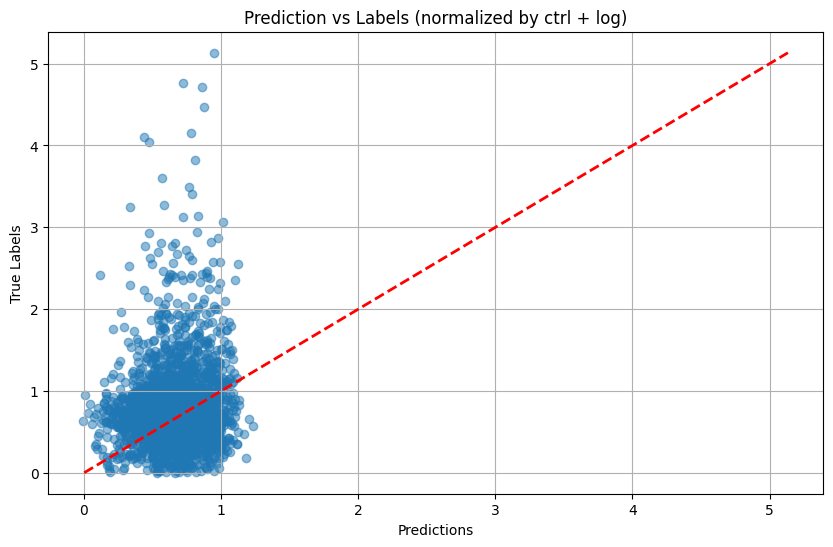

In [81]:
plot_predictions_vs_labels(predictions, labels, title='Prediction vs Labels (normalized by ctrl + log)')


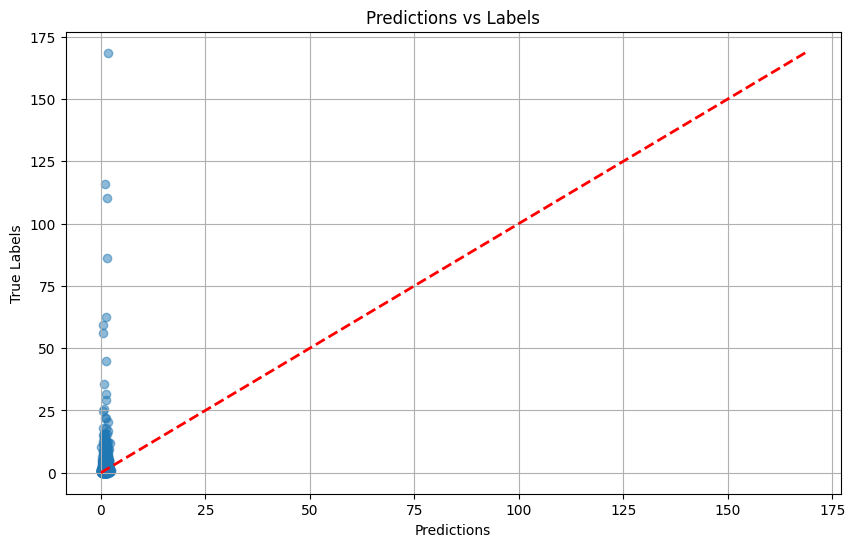

In [80]:
plot_predictions_vs_labels(predictions_inv, labels_inv)


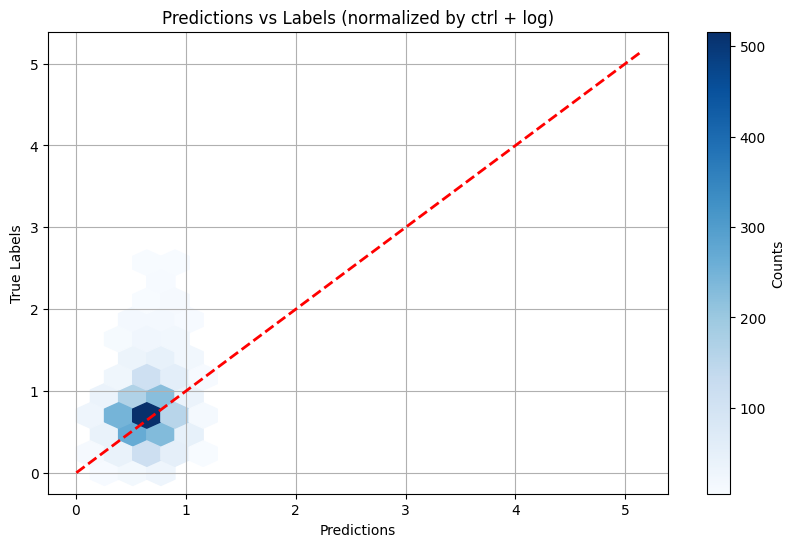

In [71]:
plot_hexbin_predictions_vs_labels(predictions, labels, title="Predictions vs Labels (normalized by ctrl + log)", gridsize=20, mincnt=5)

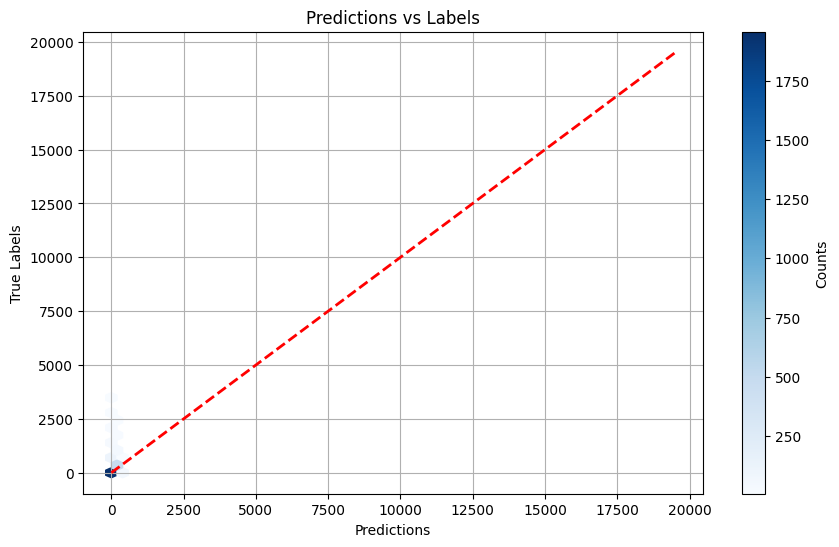

In [112]:
plot_hexbin_predictions_vs_labels(predictions_inv, labels_inv, title="Predictions vs Labels", gridsize=50, mincnt=5)

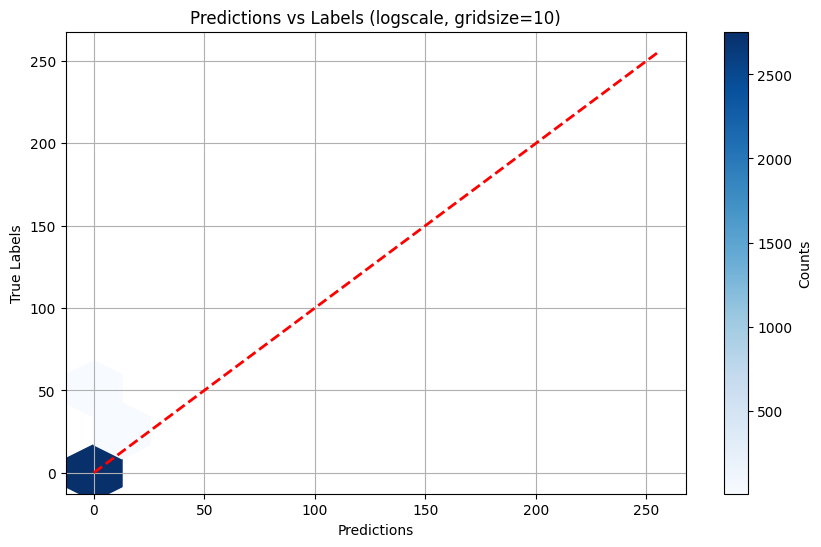

In [113]:
plot_hexbin_predictions_vs_labels(predictions, labels, title="Predictions vs Labels (logscale, gridsize=10)", gridsize=10, mincnt=5)

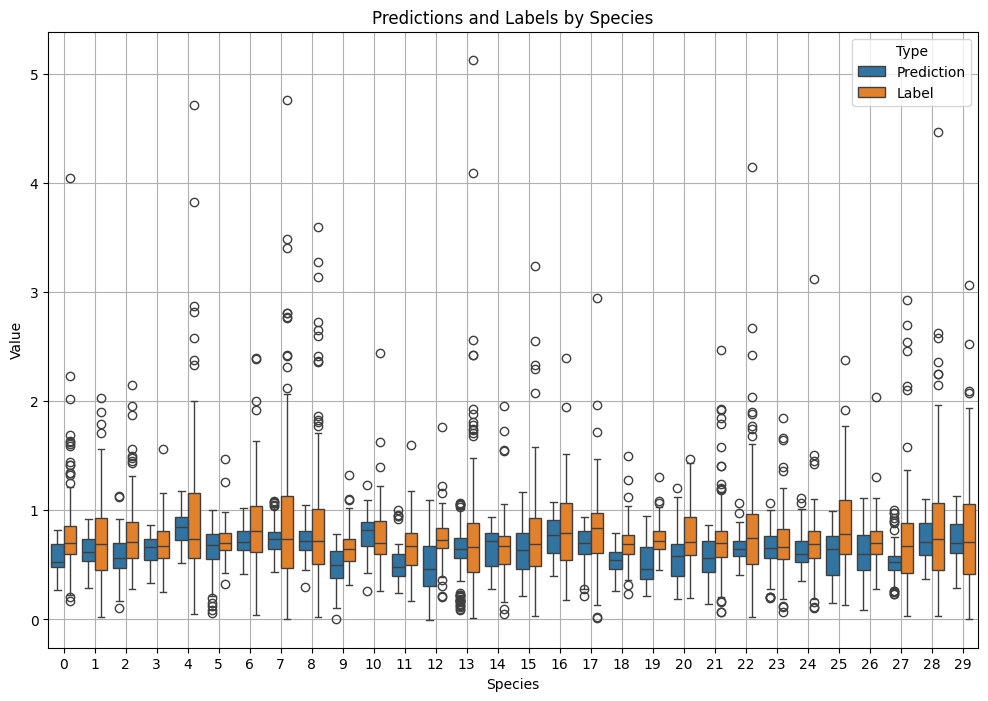

In [72]:
plot_boxplot_predictions_vs_labels(predictions, labels, species_ids, by_label='Species')

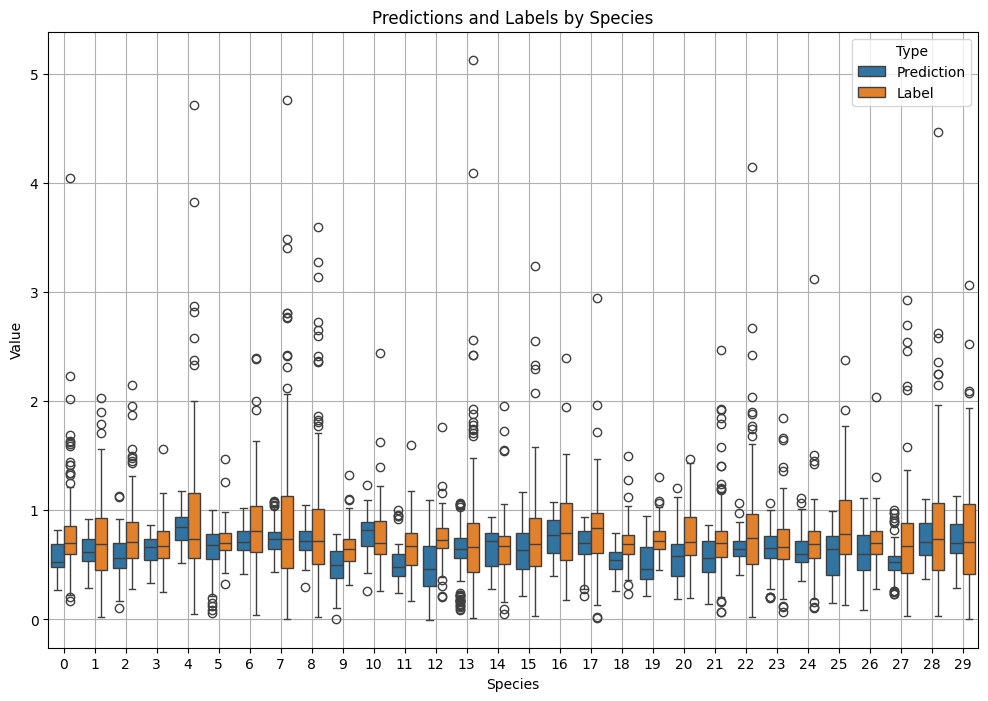

In [73]:
# Plot the boxplot
plot_boxplot_predictions_vs_labels(predictions, labels, species_ids, by_label='Species')

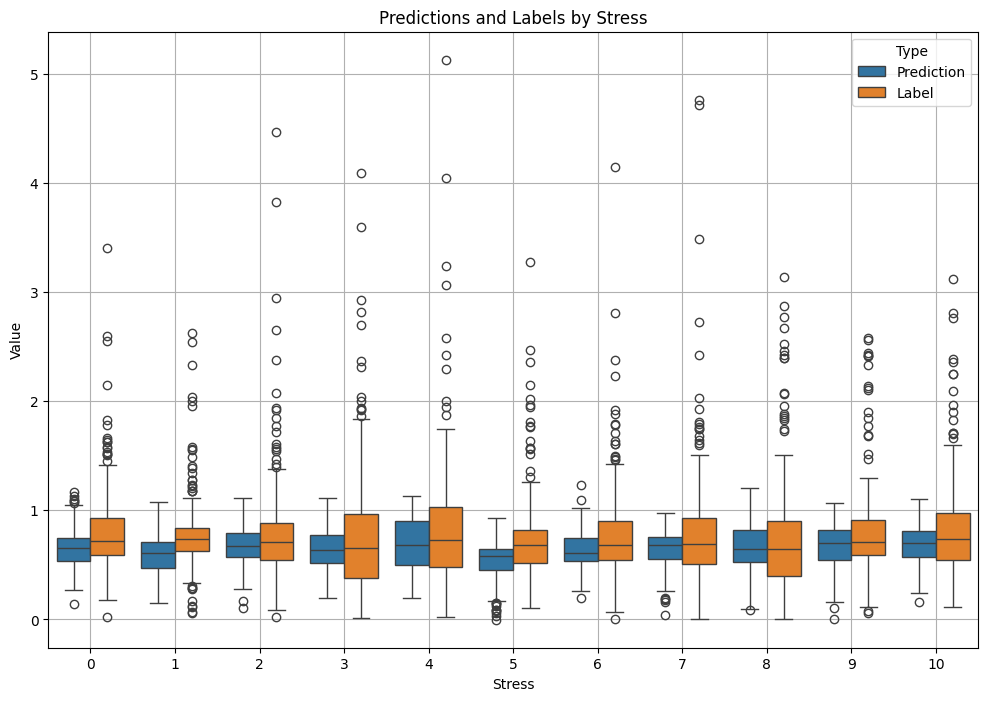

In [74]:
# Plot the boxplot
plot_boxplot_predictions_vs_labels(predictions, labels, all_stress_ids, by_label='Stress')

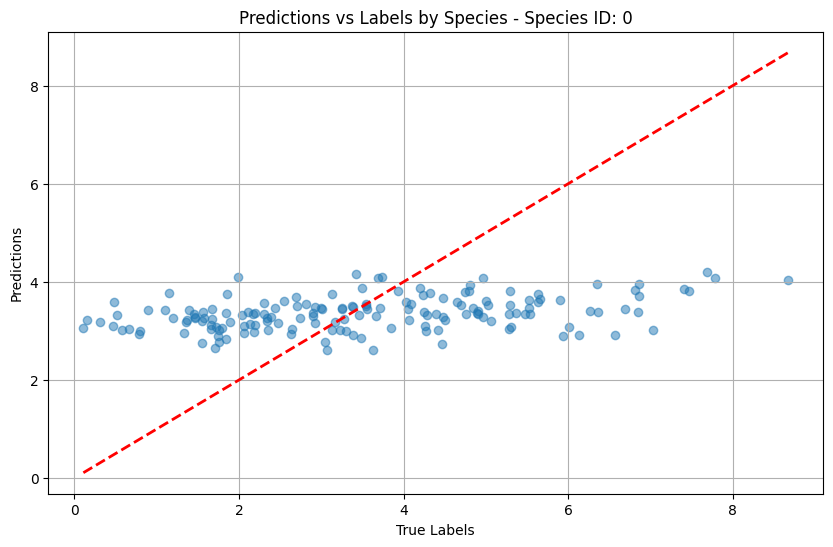

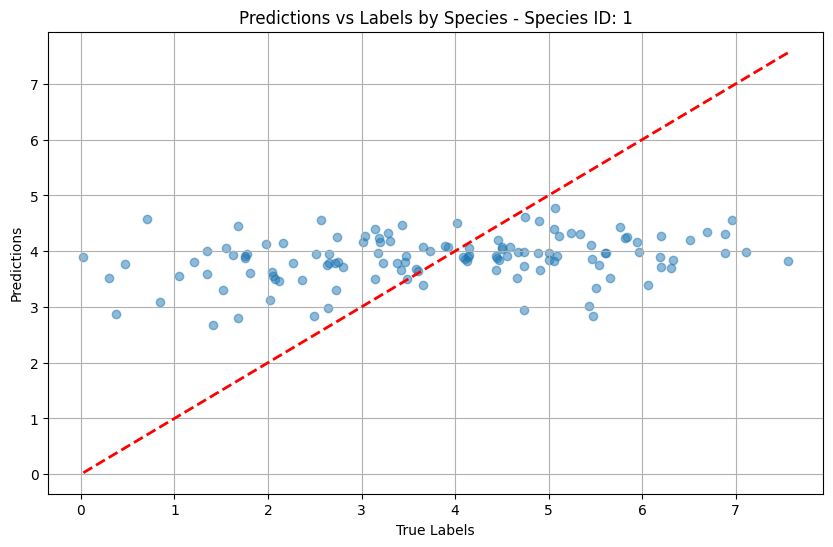

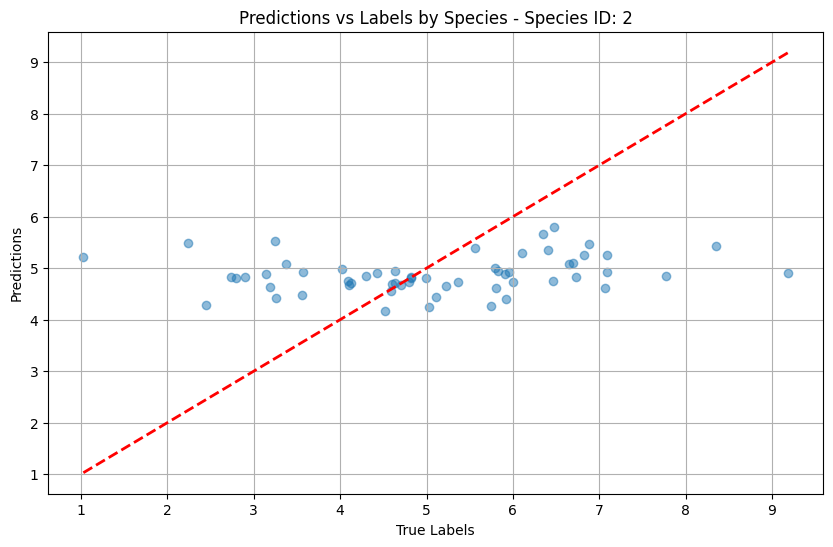

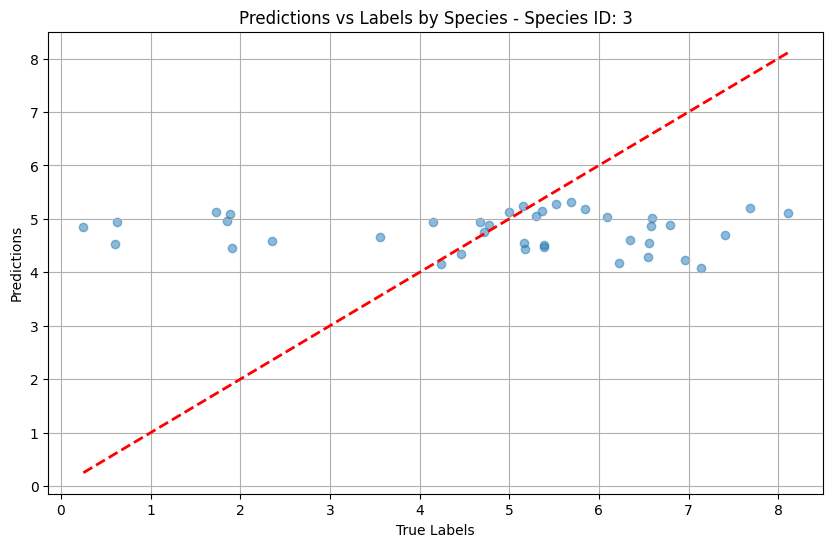

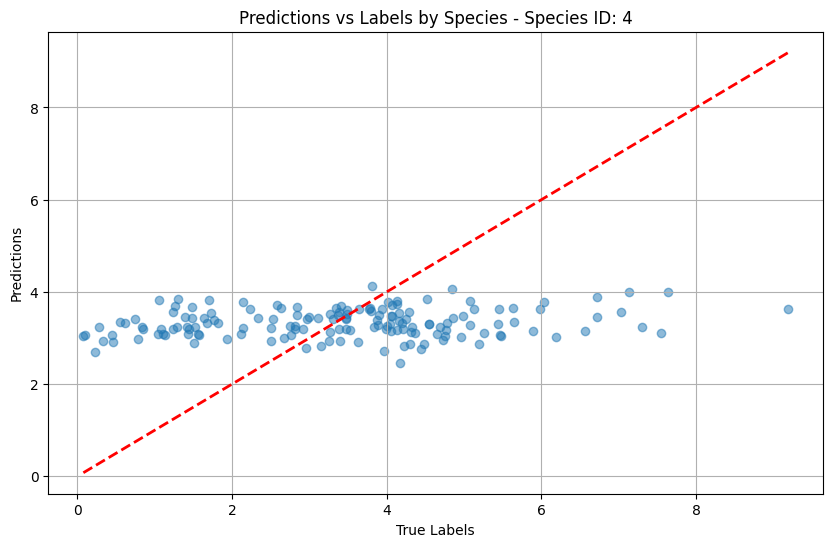

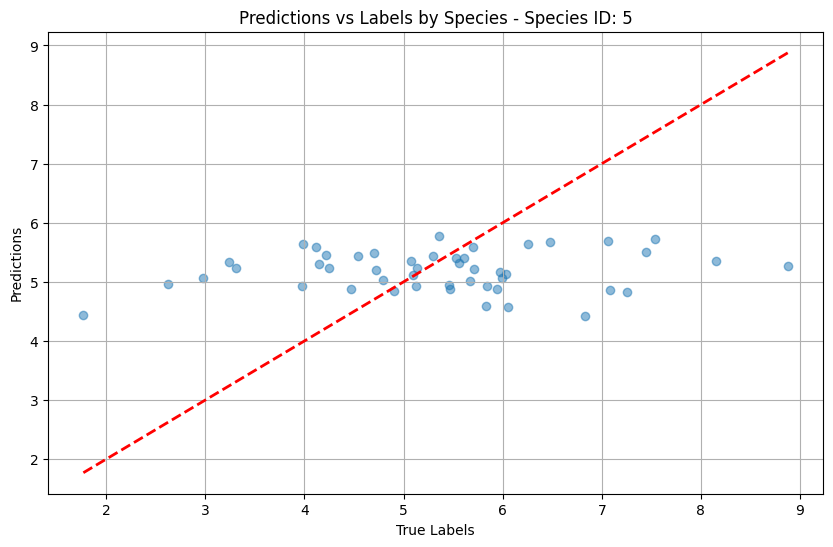

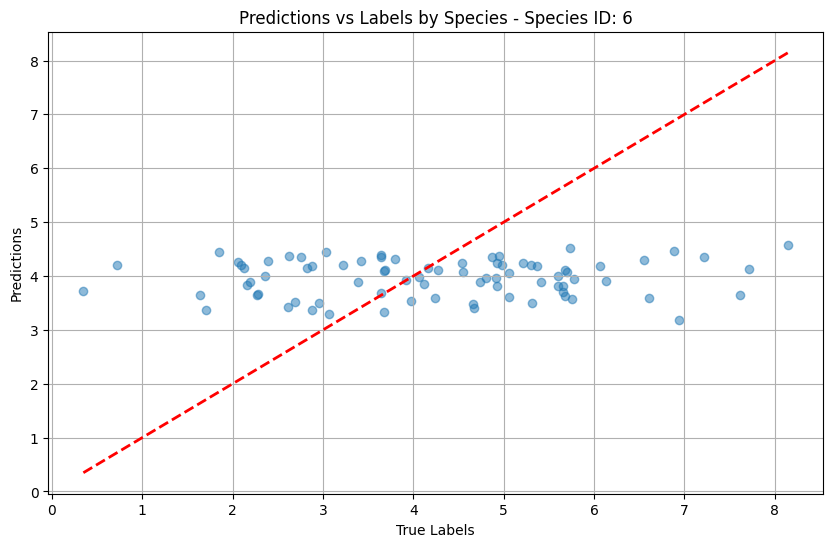

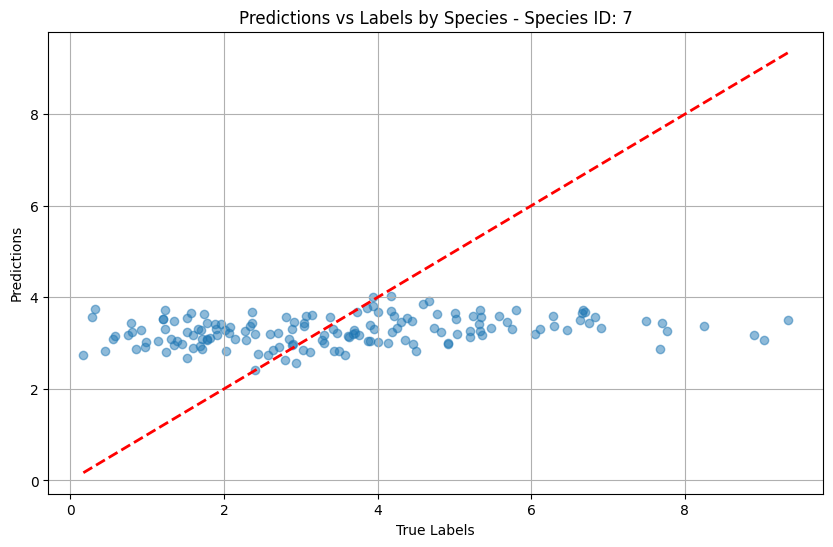

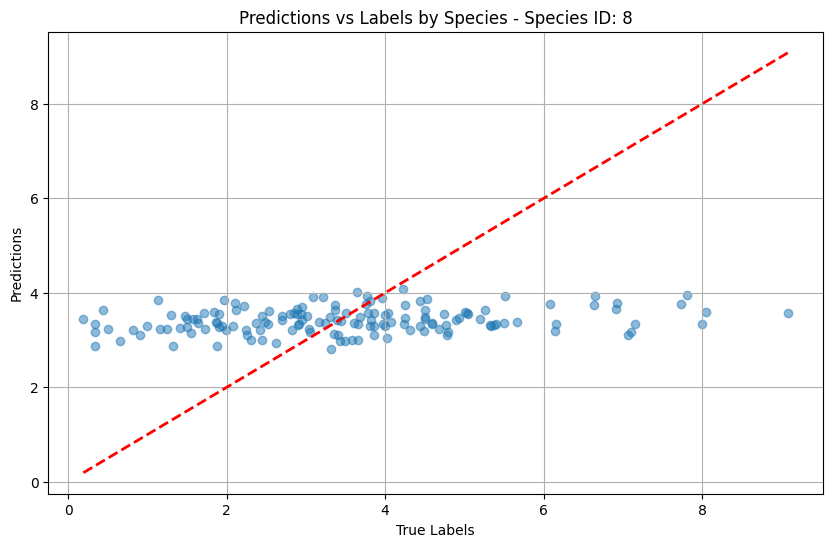

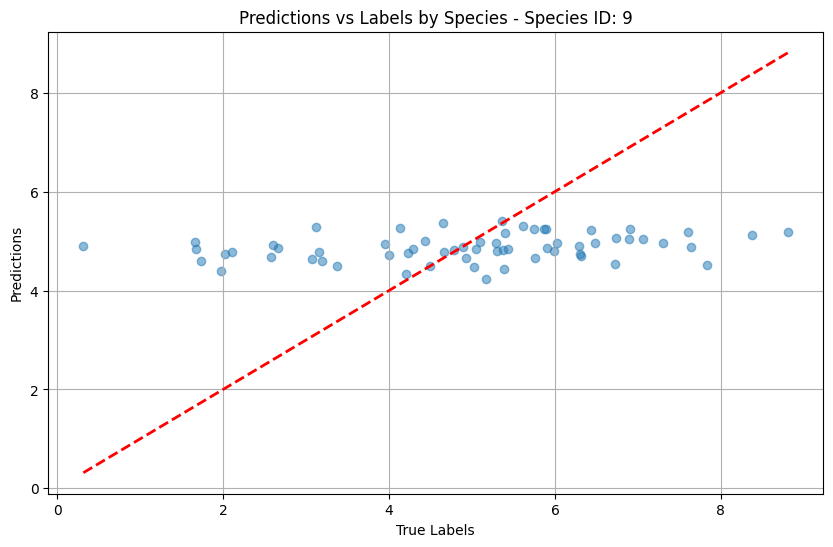

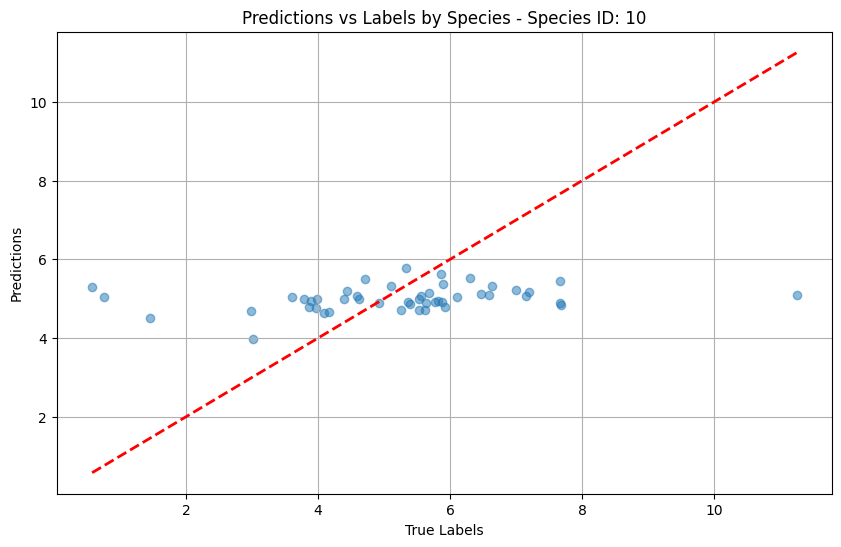

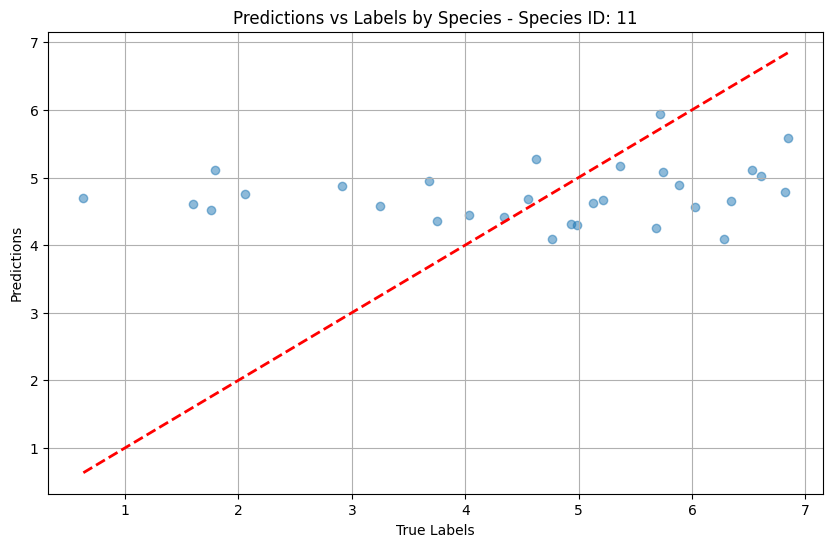

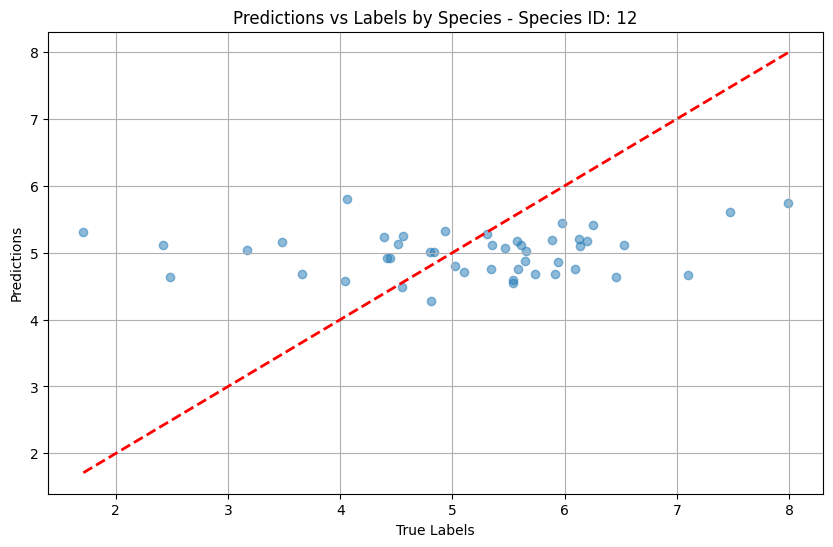

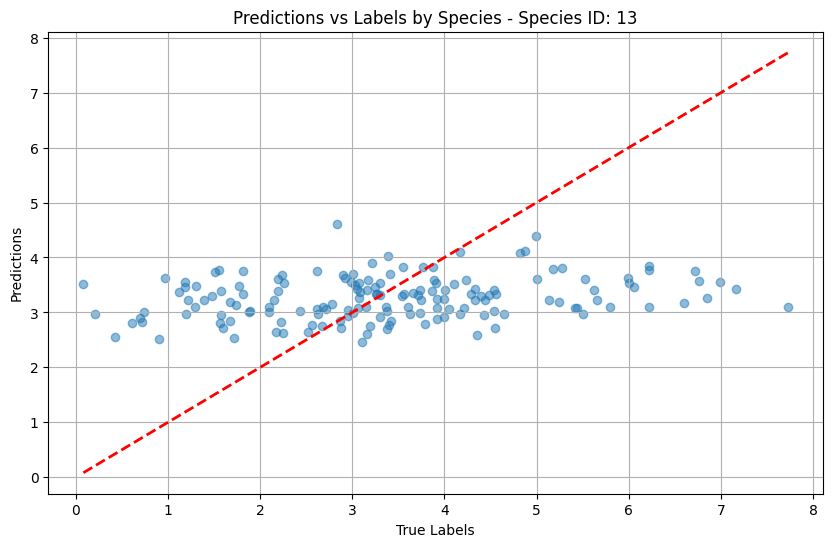

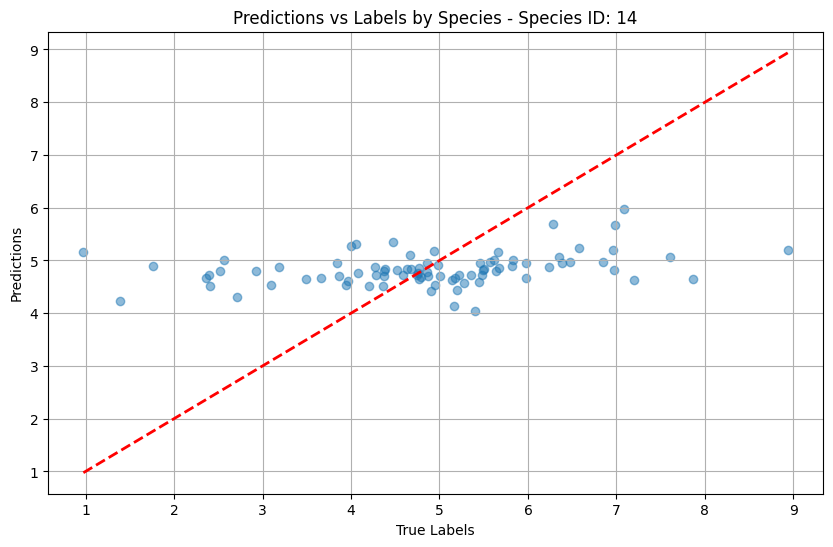

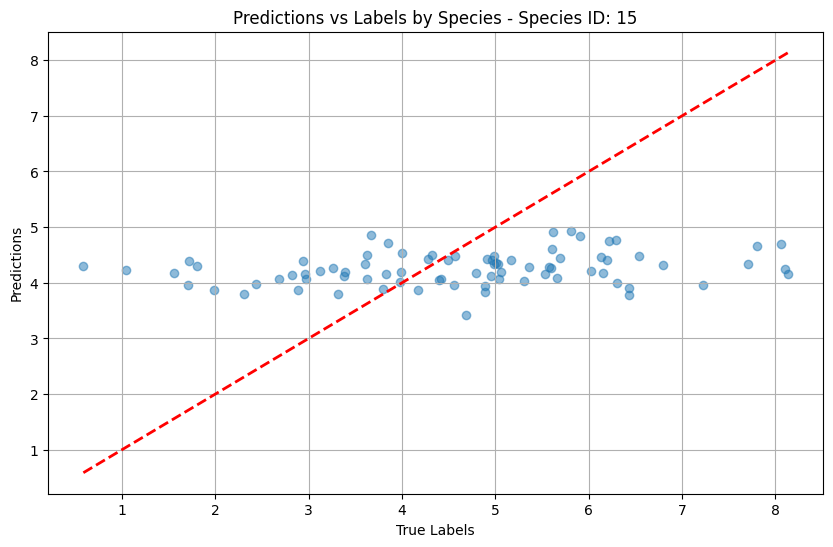

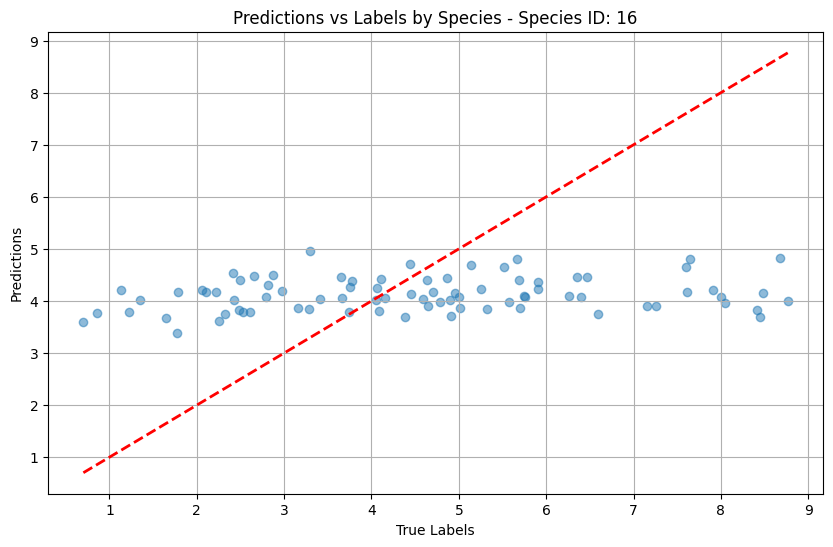

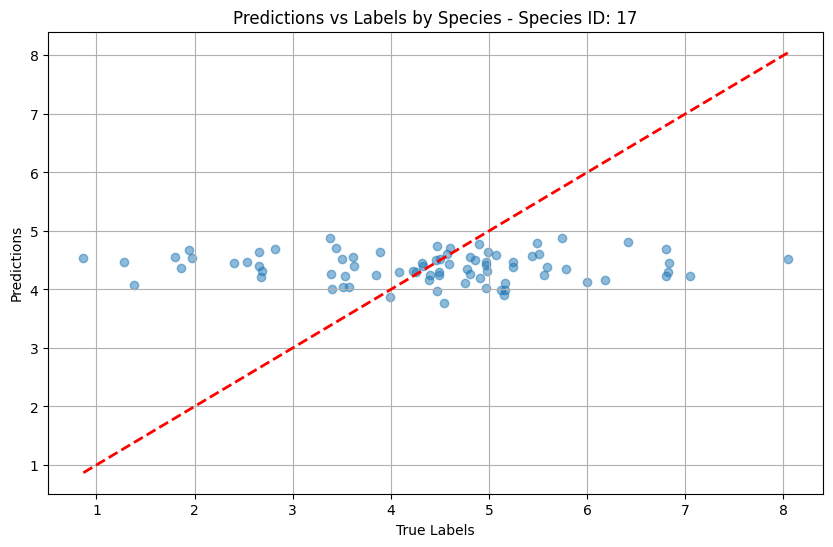

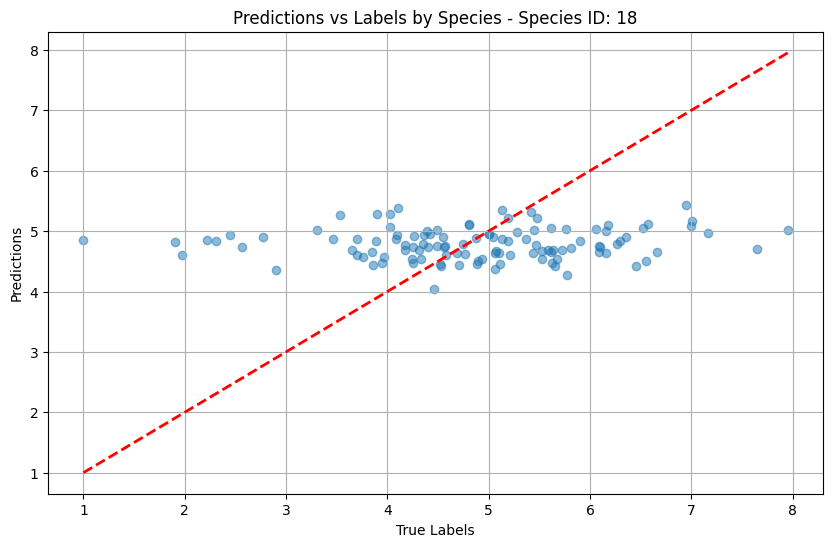

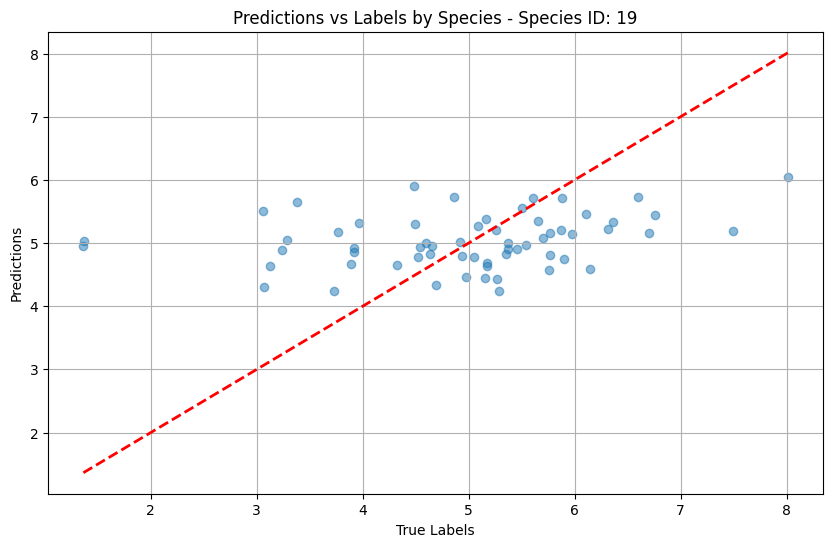

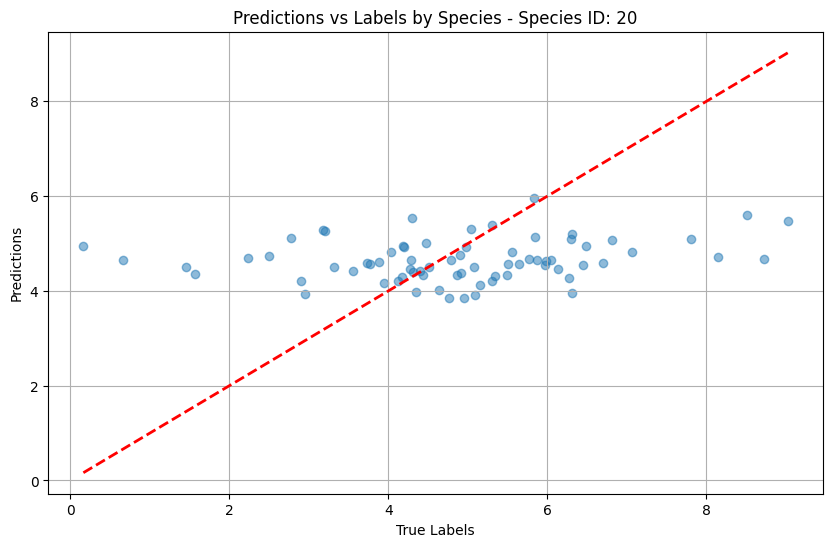

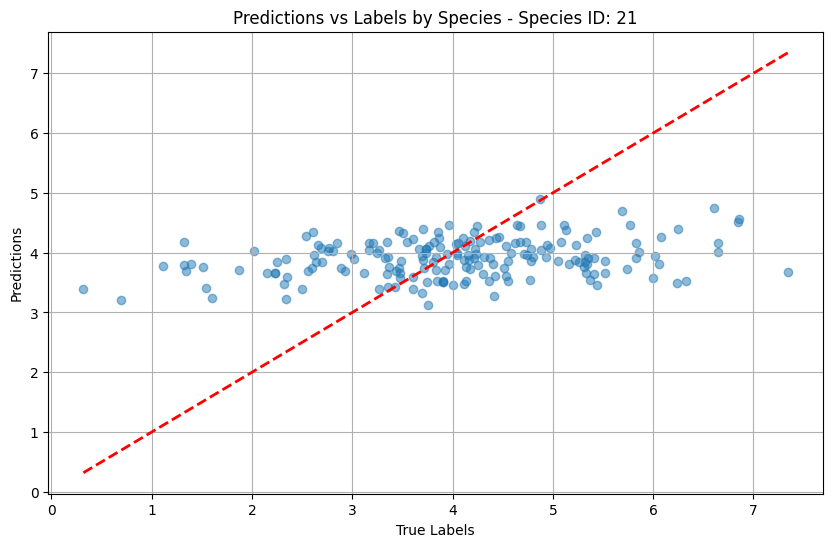

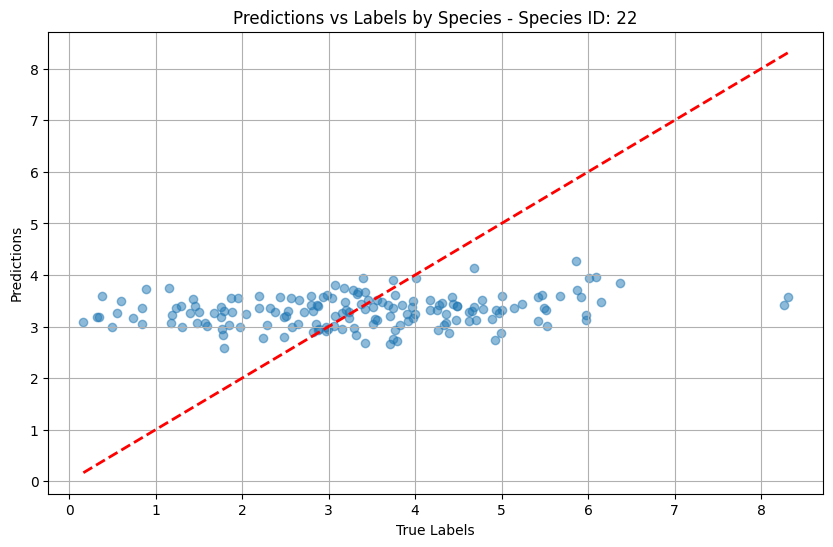

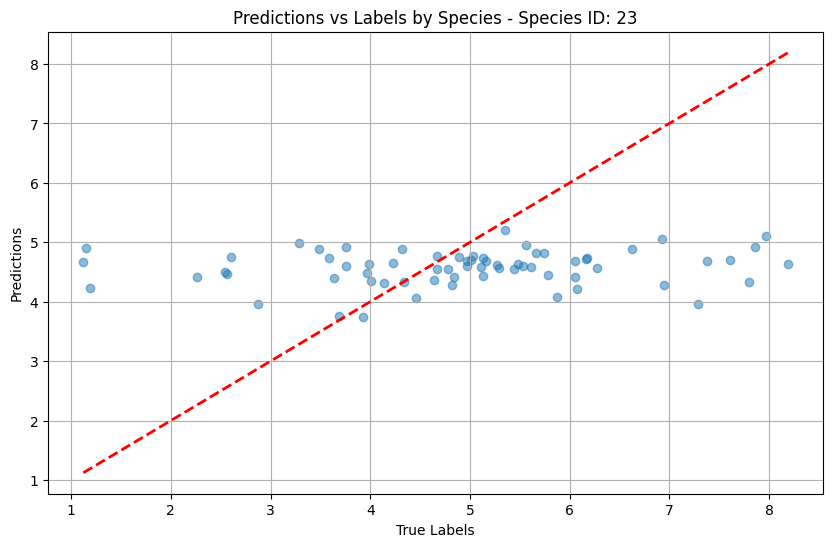

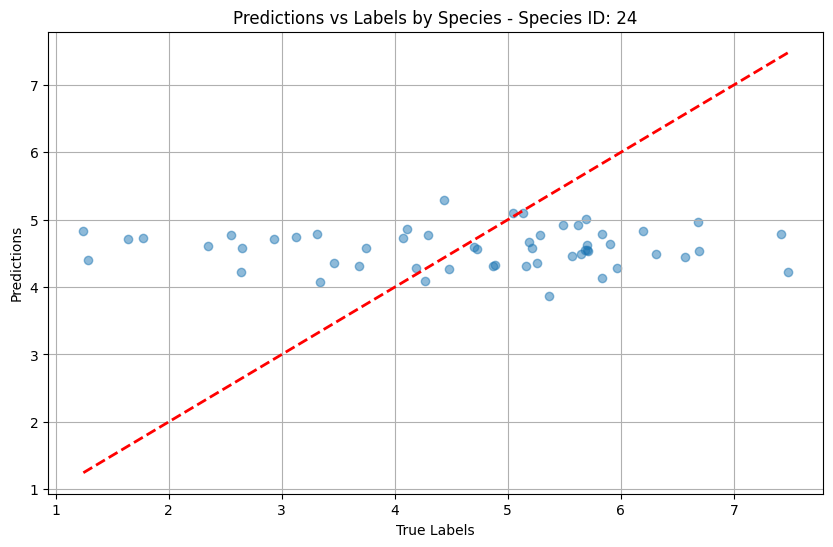

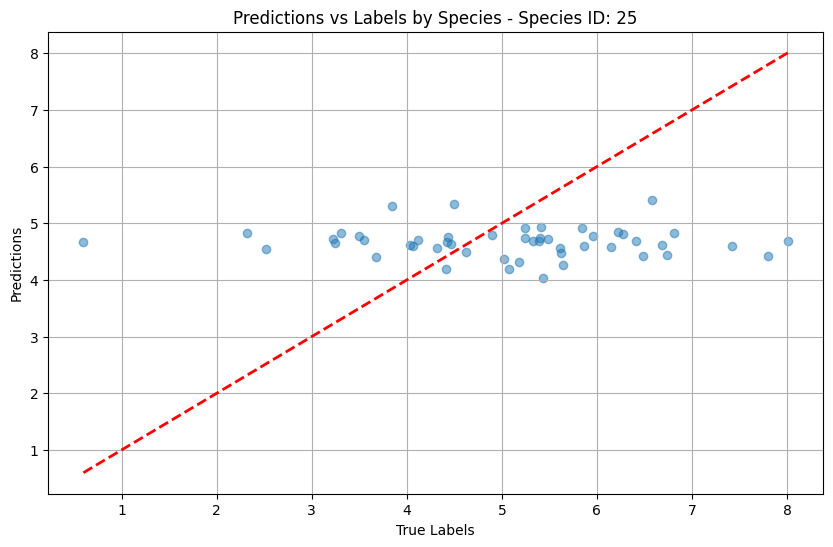

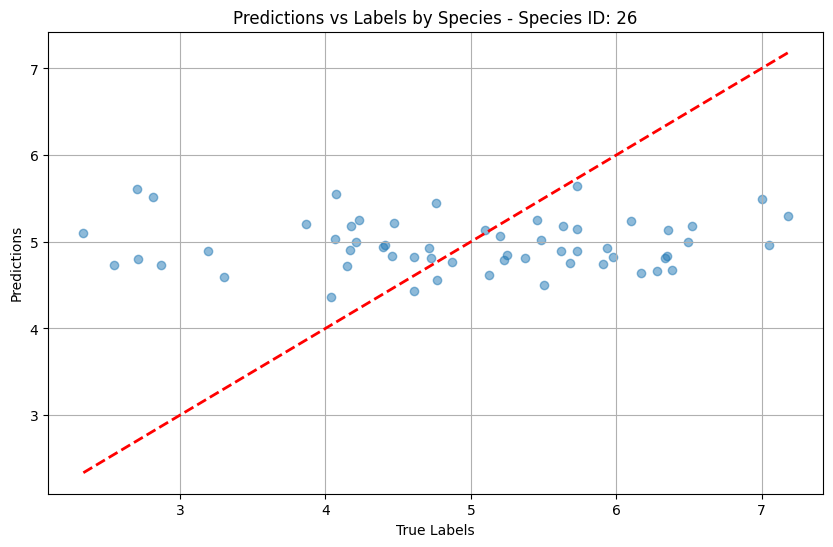

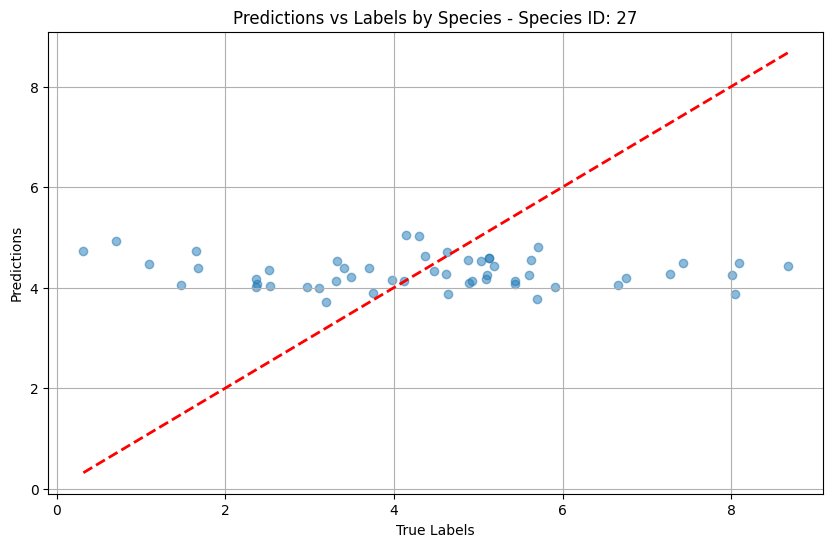

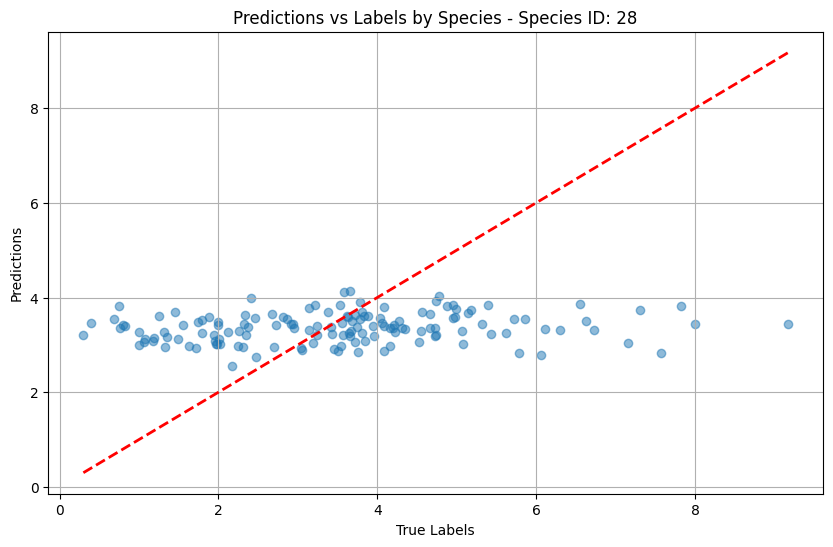

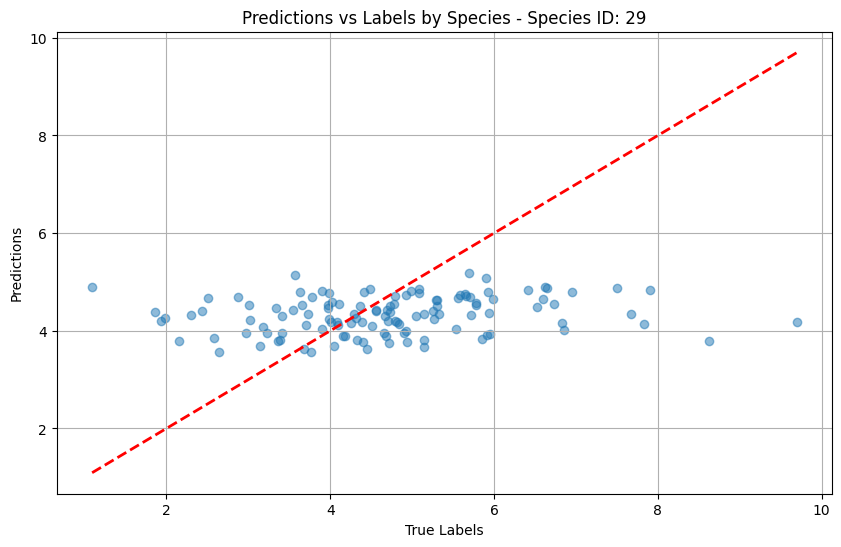

In [92]:
plot_predictions_vs_labels_by_species(predictions, labels, species_ids)


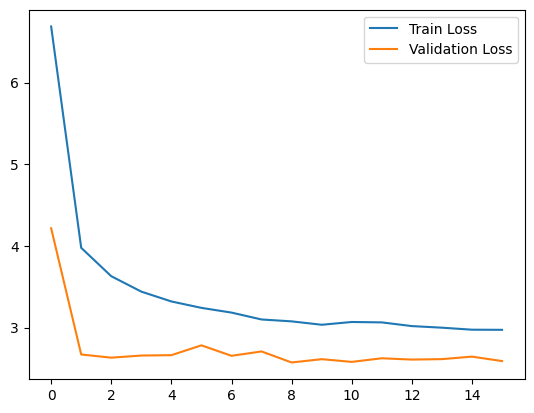

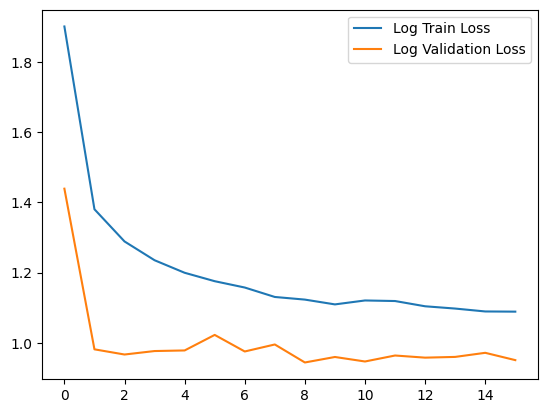

In [93]:
plot_losses(train_losses, val_losses)